In [15]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [16]:
!ls

gdrive	sample_data


In [0]:
import os
import sys
source_root_path = 'gdrive/My Drive/Colab/GenerativeDeepLearning/source'
sys.path.append(source_root_path)

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import os
from scipy.stats import norm

from utils.loaders import load_mnist, load_safari
from models.GAN import GAN

In [0]:
logs_root_path = 'gdrive/My Drive/Colab/GenerativeDeepLearning/logs'
data_dir = 'gdrive/My Drive/Colab/GenerativeDeepLearning/data'

In [0]:
# run params
SECTION = 'gan'
RUN_ID = '0001'
DATA_NAME = 'camel'
RUN_FOLDER = os.path.join(logs_root_path, SECTION)
# RUN_FOLDER = 'run/{}/'.format(SECTION)
RUN_FOLDER += '_'.join([RUN_ID, DATA_NAME])

if not os.path.exists(RUN_FOLDER):
    os.makedirs(RUN_FOLDER)
    os.makedirs(os.path.join(RUN_FOLDER, 'viz'))
    os.makedirs(os.path.join(RUN_FOLDER, 'images'))
    os.makedirs(os.path.join(RUN_FOLDER, 'weights'))

mode =  'build' #'load' #

In [0]:
(x_train, y_train) = load_safari(data_dir, DATA_NAME)

In [22]:
x_train.shape

(80000, 28, 28, 1)

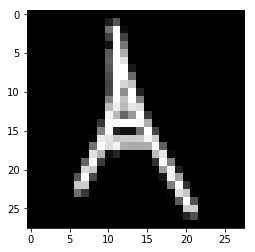

In [23]:
plt.imshow(x_train[200,:,:,0], cmap = 'gray')
plt.show()

In [0]:
gan = GAN(input_dim = (28,28,1)
        , discriminator_conv_filters = [64,64,128,128]
        , discriminator_conv_kernel_size = [5,5,5,5]
        , discriminator_conv_strides = [2,2,2,1]
        , discriminator_batch_norm_momentum = None
        , discriminator_activation = 'relu'
        , discriminator_dropout_rate = 0.4
        , discriminator_learning_rate = 0.0008
        , generator_initial_dense_layer_size = (7, 7, 64)
        , generator_upsample = [2,2, 1, 1]
        , generator_conv_filters = [128,64, 64,1]
        , generator_conv_kernel_size = [5,5,5,5]
        , generator_conv_strides = [1,1, 1, 1]
        , generator_batch_norm_momentum = 0.9
        , generator_activation = 'relu'
        , generator_dropout_rate = None
        , generator_learning_rate = 0.0004
        , optimizer = 'rmsprop'
        , z_dim = 100
        )

if mode == 'build':
    gan.save(RUN_FOLDER)
else:
    gan.load_weights(os.path.join(RUN_FOLDER, 'weights/weights.h5'))

In [25]:
gan.discriminator.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
discriminator_input (InputLa (None, 28, 28, 1)         0         
_________________________________________________________________
discriminator_conv_0 (Conv2D (None, 14, 14, 64)        1664      
_________________________________________________________________
activation_10 (Activation)   (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
discriminator_conv_1 (Conv2D (None, 7, 7, 64)          102464    
_________________________________________________________________
activation_11 (Activation)   (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 7, 7, 64)          0         
__________

In [26]:
gan.generator.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
generator_input (InputLayer) (None, 100)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 3136)              316736    
_________________________________________________________________
batch_normalization_5 (Batch (None, 3136)              12544     
_________________________________________________________________
activation_14 (Activation)   (None, 3136)              0         
_________________________________________________________________
reshape_2 (Reshape)          (None, 7, 7, 64)          0         
_________________________________________________________________
up_sampling2d_3 (UpSampling2 (None, 14, 14, 64)        0         
_________________________________________________________________
generator_conv_0 (Conv2D)    (None, 14, 14, 128)       204928    
__________

In [0]:
BATCH_SIZE = 64
EPOCHS = 6000
PRINT_EVERY_N_BATCHES = 50

In [28]:
gan.train(     
    x_train,
    batch_size = BATCH_SIZE,
    epochs = EPOCHS,
    run_folder = RUN_FOLDER,
    print_every_n_batches = PRINT_EVERY_N_BATCHES
)

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:490: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


0 [D loss: (0.744)(R 0.686, F 0.802)] [D acc: (0.398)(0.797, 0.000)] [G loss: 0.675] [G acc: 1.000]


/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:490: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


1 [D loss: (0.947)(R 0.660, F 1.234)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.689] [G acc: 1.000]
2 [D loss: (0.693)(R 0.686, F 0.700)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.688] [G acc: 1.000]
3 [D loss: (0.691)(R 0.683, F 0.699)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.688] [G acc: 1.000]
4 [D loss: (0.690)(R 0.678, F 0.702)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.688] [G acc: 1.000]
5 [D loss: (0.682)(R 0.657, F 0.707)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.688] [G acc: 1.000]
6 [D loss: (0.656)(R 0.599, F 0.714)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.689] [G acc: 1.000]
7 [D loss: (0.540)(R 0.374, F 0.707)] [D acc: (0.508)(1.000, 0.016)] [G loss: 0.699] [G acc: 0.000]
8 [D loss: (0.375)(R 0.054, F 0.696)] [D acc: (0.789)(1.000, 0.578)] [G loss: 0.725] [G acc: 0.000]
9 [D loss: (0.335)(R 0.020, F 0.651)] [D acc: (1.000)(1.000, 1.000)] [G loss: 1.103] [G acc: 0.000]
10 [D loss: (0.208)(R 0.001, F 0.415)] [D acc: (1.000)(1.000, 1.000)] [G loss: 3.325] [G acc: 0.000]

KeyboardInterrupt: ignored

<Figure size 1080x1080 with 0 Axes>

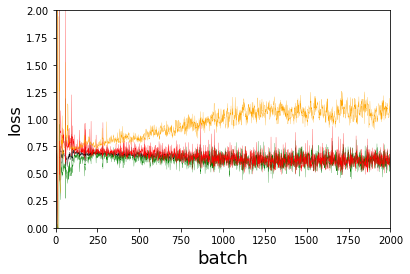

In [29]:
fig = plt.figure()
plt.plot([x[0] for x in gan.d_losses], color='black', linewidth=0.25)

plt.plot([x[1] for x in gan.d_losses], color='green', linewidth=0.25)
plt.plot([x[2] for x in gan.d_losses], color='red', linewidth=0.25)
plt.plot([x[0] for x in gan.g_losses], color='orange', linewidth=0.25)

plt.xlabel('batch', fontsize=18)
plt.ylabel('loss', fontsize=16)

plt.xlim(0, 2000)
plt.ylim(0, 2)

plt.show()

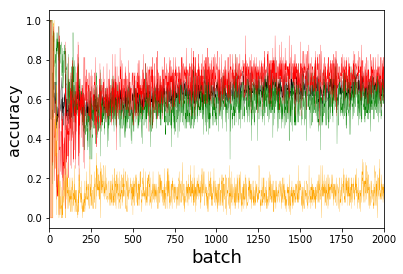

In [30]:
fig = plt.figure()
plt.plot([x[3] for x in gan.d_losses], color='black', linewidth=0.25)
plt.plot([x[4] for x in gan.d_losses], color='green', linewidth=0.25)
plt.plot([x[5] for x in gan.d_losses], color='red', linewidth=0.25)
plt.plot([x[1] for x in gan.g_losses], color='orange', linewidth=0.25)

plt.xlabel('batch', fontsize=18)
plt.ylabel('accuracy', fontsize=16)

plt.xlim(0, 2000)

plt.show()